In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


In [4]:
control_df = pd.read_csv ('control_group.csv', delimiter = ';')
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df = pd.read_csv ('test_group.csv', delimiter = ';')
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
print (control_df.shape)
print (test_df.shape)

(30, 10)
(30, 10)


In [7]:
print (control_df.columns)
print (test_df.columns)

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')
Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')


In [8]:
print (control_df.info (verbose=True, show_counts=True))
print (test_df.info (verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 

In [9]:
# control group has a set of values missing. 

In [10]:
control_df.head(30)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [11]:
#Row 4 is the row missing values

In [12]:
#Remove all rows with missing values
control_df = control_df.dropna()

In [13]:
# Checking there are no missing values left
print (control_df.info (verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
None


In [14]:
control_df.head(30)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [15]:
control_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [16]:
test_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


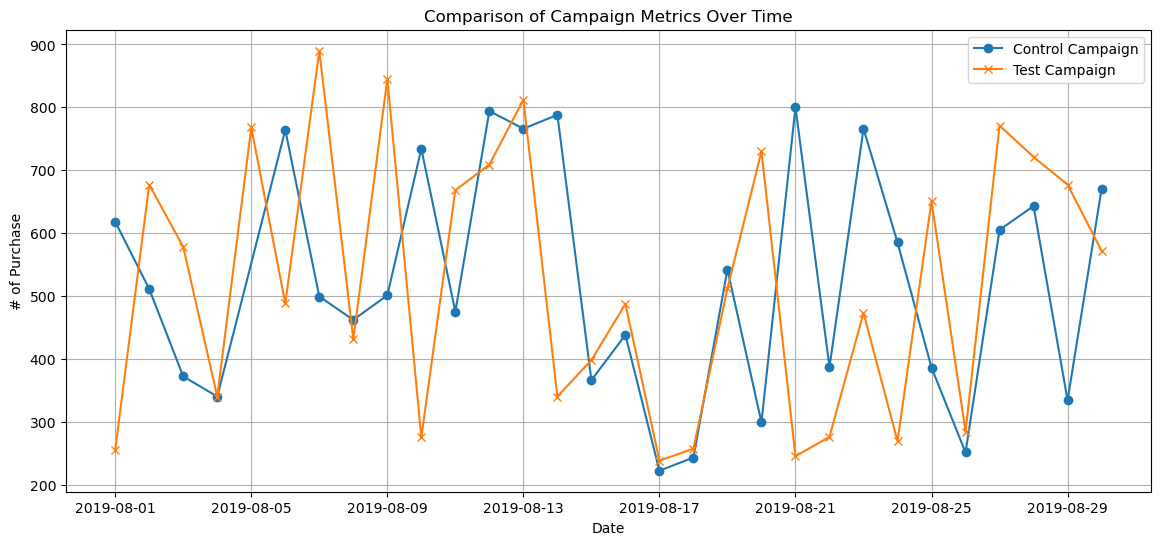

In [17]:
# # of Purchase trend Overtime 
#ensure order date is in datetime format
control_df['Date'] = pd.to_datetime(control_df['Date'], format = '%d.%m.%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format = '%d.%m.%Y')

plt.figure(figsize=(14, 6))
# Plot the first campaign data
plt.plot(control_df['Date'], control_df['# of Purchase'], label='Control Campaign', marker='o')

# Plot the second campaign data
plt.plot(test_df['Date'], test_df['# of Purchase'], label='Test Campaign', marker='x')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('# of Purchase')
plt.title('Comparison of Campaign Metrics Over Time')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Control Campaign Mean: 522.7931034482758
Test Campaign Mean: 521.2333333333333
T-test p-value: 0.9760568756579724


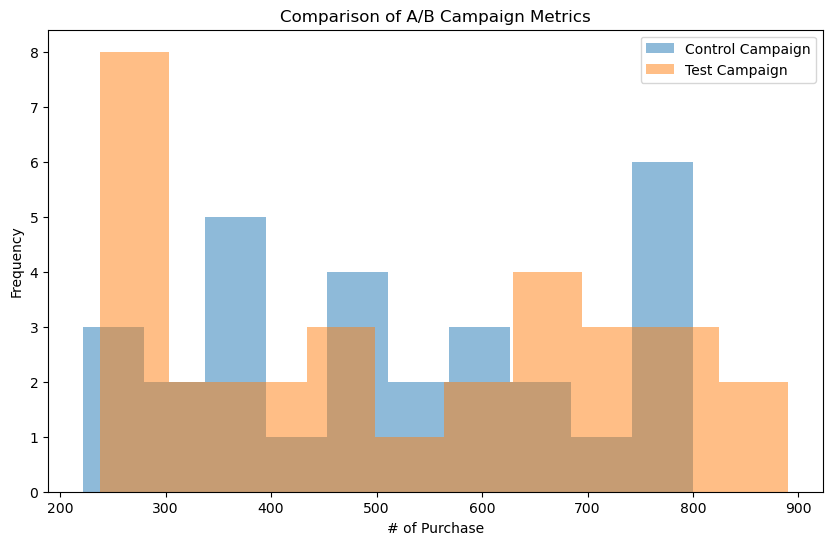

In [18]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

# Descriptive Statistics
print("Control Campaign Mean:", control_df['# of Purchase'].mean())
print("Test Campaign Mean:", test_df['# of Purchase'].mean())

# T-test
t_stat, p_value = stats.ttest_ind(control_df['# of Purchase'], test_df['# of Purchase'])
print("T-test p-value:", p_value)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(control_df['# of Purchase'], alpha=0.5, label='Control Campaign')
plt.hist(test_df['# of Purchase'], alpha=0.5, label='Test Campaign')
plt.title('Comparison of A/B Campaign Metrics')
plt.xlabel('# of Purchase')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [19]:
# T-test (for normally distributed data)
t_stat, p_value = stats.ttest_ind(control_df['# of Purchase'], test_df['# of Purchase'])
print("T-test p-value:", p_value)

# Mann-Whitney U test (for non-normally distributed data)
u_stat, p_value = stats.mannwhitneyu(control_df['# of Purchase'], test_df['# of Purchase'])
print("Mann-Whitney U Test p-value:", p_value)

T-test p-value: 0.9760568756579724
Mann-Whitney U Test p-value: 0.957674926453464


In [20]:
#The results suggest no meaningful difference between the performance of the control campaign and testing campaign in the # of Purchase. 
#The high p-value indicates that any observed differences are probably not due to the campaign itself but rather to random variability in the data.

In [21]:
# Calculate ROI
control_roi = (control_df['# of Purchase'].sum() / control_df['Spend [USD]'].sum()) * 100
test_roi = (test_df['# of Purchase'].sum() / test_df['Spend [USD]'].sum()) * 100
print(f"Control Campaign ROI: {control_roi:.2f}%")
print(f"Test Campaign ROI: {test_roi:.2f}%")

# Calculate Conversion Rate (Purchases / Impressions)
control_conversion_rate = (control_df['# of Purchase'].sum() / control_df['# of Impressions'].sum()) * 100
test_conversion_rate = (test_df['# of Purchase'].sum() / test_df['# of Impressions'].sum()) * 100
print(f"Control Campaign Conversion Rate: {control_conversion_rate:.2f}%")
print(f"Test Campaign Conversion Rate: {test_conversion_rate:.2f}%")

Control Campaign ROI: 22.69%
Test Campaign ROI: 20.34%
Control Campaign Conversion Rate: 0.48%
Test Campaign Conversion Rate: 0.70%


In [22]:
#The Control Campaign has a slightly higher ROI (22.69%) than the Test Campaign (20.34%). 
#This suggests that the Control campaign generates slightly more value for the money spent, however, the difference is not very large.
#The Test Campaign has a higher conversion rate (0.70%) than the Control Campaign (0.48%). 
#This indicates that the Test campaign is more effective at turning impressions into purchases, despite the slightly lower ROI.
#If Profitability is Key (ROI Focus): The Control campaign would be more effective since it has a higher ROI.
#If Conversion is the Goal (Customer Acquisition Focus): The Test campaign would be better due to its higher conversion rate.


Control Campaign CPC: $4.41
Test Campaign CPC: $4.92


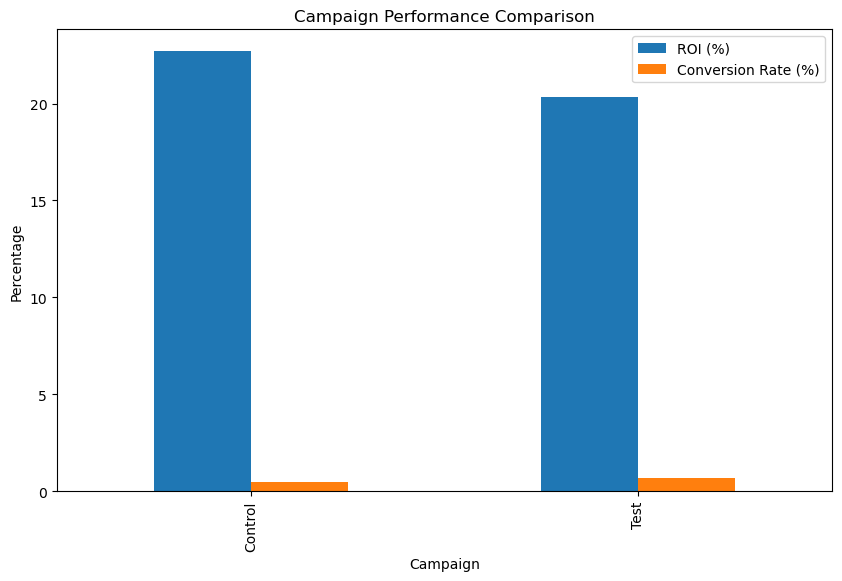

In [23]:
# Calculate CPC (Cost Per Conversion)
control_cpc = control_df['Spend [USD]'].sum() / control_df['# of Purchase'].sum()
test_cpc = test_df['Spend [USD]'].sum() / test_df['# of Purchase'].sum()
print(f"Control Campaign CPC: ${control_cpc:.2f}")
print(f"Test Campaign CPC: ${test_cpc:.2f}")

# Visualizing Both Metrics Together
metrics_df = pd.DataFrame({
    'Campaign': ['Control', 'Test'],
    'ROI (%)': [control_roi, test_roi],
    'Conversion Rate (%)': [control_conversion_rate, test_conversion_rate]
})

metrics_df.plot(x='Campaign', y=['ROI (%)', 'Conversion Rate (%)'], kind='bar', figsize=(10, 6), title='Campaign Performance Comparison')
plt.ylabel('Percentage')
plt.show()

In [24]:
#The Control campaign has a lower CPC ($4.41), meaning it is more cost-effective at driving purchases.
#The Test campaign has a higher CPC ($4.92), meaning it is slightly more expensive to achieve each conversion.
#Despite the Test campaign having a higher conversion rate, it is also more expensive in terms of  Cost Per Conversion (CPC). 
#This means that even though it converts more impressions into purchases, it costs more per conversion compared to the Control campaign.
# The Control campaign is more cost-effective with a lower CPC. The Test campaign drives more conversions but at a higher cost.

In [25]:
#Conversion Funnel Analysis:
#Conversion Rates at Each Funnel Stage:
control_funnel = {
    'Impressions to Clicks': control_df['# of Website Clicks'].sum() / control_df['# of Impressions'].sum(),
    'Clicks to Searches': control_df['# of Searches'].sum() / control_df['# of Website Clicks'].sum(),
    'Searches to View Content': control_df['# of View Content'].sum() / control_df['# of Searches'].sum(),
    'View Content to Add to Cart': control_df['# of Add to Cart'].sum() / control_df['# of View Content'].sum(),
    'Add to Cart to Purchase': control_df['# of Purchase'].sum() / control_df['# of Add to Cart'].sum()
}

test_funnel = {
    'Impressions to Clicks': (test_df['# of Website Clicks'].sum() / test_df['# of Impressions'].sum()),
    'Clicks to Searches': test_df['# of Searches'].sum() / test_df['# of Website Clicks'].sum(),
    'Searches to View Content': test_df['# of View Content'].sum() / test_df['# of Searches'].sum(),
    'View Content to Add to Cart': test_df['# of Add to Cart'].sum() / test_df['# of View Content'].sum(),
    'Add to Cart to Purchase': test_df['# of Purchase'].sum() / test_df['# of Add to Cart'].sum()
}
# Convert funnel ratios to percentages
control_funnel_percentage = {key: f"{value * 100:.2f}%" for key, value in control_funnel.items()}
test_funnel_percentage = {key: f"{value * 100:.2f}%" for key, value in test_funnel.items()}

# Display the results in a nicely formatted manner
print("Control Campaign Funnel Conversion Rates:")
for step, percentage in control_funnel_percentage.items():
    print(f"{step}: {percentage}")  

print("\nTest Campaign Funnel Conversion Rates:")
for step, percentage in test_funnel_percentage.items():
    print(f"{step}: {percentage}")

Control Campaign Funnel Conversion Rates:
Impressions to Clicks: 4.86%
Clicks to Searches: 41.75%
Searches to View Content: 87.51%
View Content to Add to Cart: 66.88%
Add to Cart to Purchase: 40.21%

Test Campaign Funnel Conversion Rates:
Impressions to Clicks: 8.09%
Clicks to Searches: 40.10%
Searches to View Content: 76.81%
View Content to Add to Cart: 47.45%
Add to Cart to Purchase: 59.13%


In [26]:
#Impressions to Clicks:
#The Test Campaign has a higher conversion rate from impressions to clicks, meaning it is more effective at getting users to engage with the ad. 
#This could be due to better ad creatives, more relevant targeting, or more compelling messaging.

#Clicks to Searches:
#Both campaigns have similar conversion rates for turning clicks into searches, but the Control Campaign is slightly better. 
#This step represents how well users are navigating after clicking on the ad. 
#The difference is minimal, suggesting that the landing page and search prompts are relatively similar in effectiveness.

#Searches to View Content:
#The Control Campaign is significantly more effective at converting searches into content views. 
#Users are more engaged after searching, likely due to better user experience or more relevant content. 
#The Test Campaign shows a drop-off here, indicating potential issues with content relevancy or page experience.

# View Content to Add to Cart:
#Again, the Control Campaign is more successful at moving users from viewing content to adding items to their cart. 
#This is a critical stage in the funnel, and the Test Campaign underperforms here. 
#This suggests that while users are interested in the content, they might not find the products appealing enough to add to their cart, 
#or there could be friction in the process (e.g., poor user interface).

#Add to Cart to Purchase:
#The Test Campaign excels at converting users who add items to their cart into actual purchasers. 
#Once users get to the cart stage, they are more likely to complete their purchase in the Test Campaign than in the Control Campaign. 
#This could indicate better checkout processes, more appealing offers, or stronger purchase incentives in the Test Campaign.

#Conclusion:
#The Test Campaign drives higher engagement early in the funnel and is more effective at converting potential customers into actual buyers once they reach the cart stage.
#The Control Campaign is better at guiding users through the middle of the funnel but struggles at the final purchase stage.

#Recommendations:
#Test Campaign: 
#Focus on improving the user journey from searches to content views and content views to add-to-cart. 
#There might be issues with product relevancy, content quality, or user experience that are causing drop-offs.

#Control Campaign: 
#Investigate why users who add items to their cart are less likely to complete their purchase compared to the Test Campaign. 
#This could involve reviewing checkout processes, pricing strategies, or additional purchase incentives.

In [27]:
#Cost-Effectiveness Metrics:
#CPM measures how much it costs to get 1,000 ad impressions.
control_cpm = (control_df['Spend [USD]'].sum() / control_df['# of Impressions'].sum()) * 1000
test_cpm = (test_df['Spend [USD]'].sum() / test_df['# of Impressions'].sum()) * 1000

#CPS measures how much it costs to get a user to perform a search on your website after interacting with the ad.
control_cps = control_df['Spend [USD]'].sum() / control_df['# of Searches'].sum()
test_cps = test_df['Spend [USD]'].sum() / test_df['# of Searches'].sum()

print(f"Control Campaign CPM: ${control_cpm:.2f}")
print(f"Test Campaign CPM: ${test_cpm:.2f}")
print(f"Control Campaign CPS: ${control_cps:.2f}")
print(f"Test Campaign CPS: ${test_cps:.2f}")

Control Campaign CPM: $21.03
Test Campaign CPM: $34.36
Control Campaign CPS: $1.04
Test Campaign CPS: $1.06


In [28]:
#The Control Campaign is more cost-effective in terms of impressions, costing only $21.03 per 1,000 impressions compared to $34.36 for the Test Campaign.
#The Control Campaign is slightly more cost-effective, with a CPS of $1.04 compared to $1.06 for the Test Campaign.


95% Confidence Interval for the Difference in Conversion Rates: [-0.0055, -0.0015]


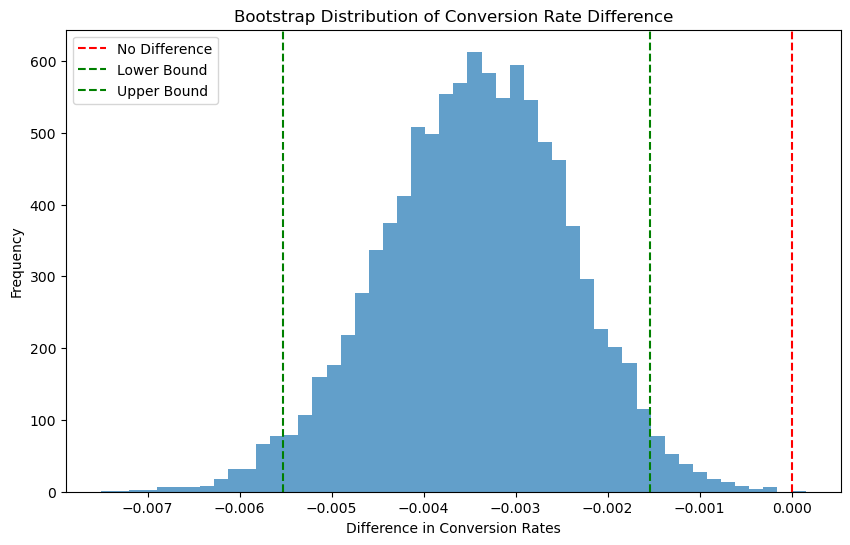

In [29]:
# Define a function for bootstrapping
def bootstrap(data1, data2, num_iterations=10000, statistic=np.mean):
    # Generate distributions by sampling with replacement
    dist1 = [statistic(np.random.choice(data1, size=len(data1), replace=True)) for _ in range(num_iterations)]
    dist2 = [statistic(np.random.choice(data2, size=len(data2), replace=True)) for _ in range(num_iterations)]
    
    # Calculate the difference in the statistics (e.g., mean)
    diff_distribution = np.array(dist1) - np.array(dist2)
    
    # Calculate confidence intervals
    lower_bound = np.percentile(diff_distribution, 2.5)
    upper_bound = np.percentile(diff_distribution, 97.5)
    
    return diff_distribution, lower_bound, upper_bound

# Bootstrapping the conversion rates
control_conversion_rate = control_df['# of Purchase'] / control_df['# of Impressions']
test_conversion_rate = test_df['# of Purchase'] / test_df['# of Impressions']

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_conversion_rate, test_conversion_rate)

# Display results
print(f"95% Confidence Interval for the Difference in Conversion Rates: [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of Conversion Rate Difference')
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [30]:
#The results suggest that the control campaign has a statistically significantly better conversion rate than the test campaign. 
#Even though the difference may seem small (between 0.15% and 0.55%), 
#it is consistent enough across the bootstrap samples to conclude that the control campaign is more effective in driving conversions.

95% Confidence Interval for the Difference in Cost Per Click: [-0.0728, 0.1271]


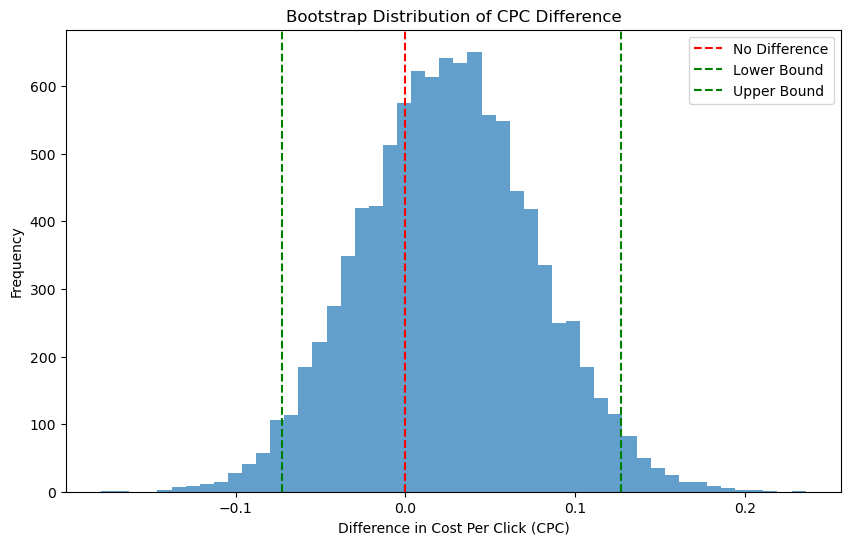

In [32]:
# Bootstrapping Cost Per Click (CPC)
control_cpc = control_df['Spend [USD]'] / control_df['# of Website Clicks']
test_cpc = test_df['Spend [USD]'] / test_df['# of Website Clicks']

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_cpc, test_cpc)

# Display results
print(f"95% Confidence Interval for the Difference in Cost Per Click: [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of CPC Difference')
plt.xlabel('Difference in Cost Per Click (CPC)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [ ]:
#The confidence interval suggests that there is no clear difference in the CPC between the two campaigns, as zero falls within the interval. 
#This implies that the campaigns are likely performing similarly in terms of cost efficiency when generating clicks.

95% Confidence Interval for the Difference in Cost Per Thousand Impressions : [-30.0297, -12.9585]


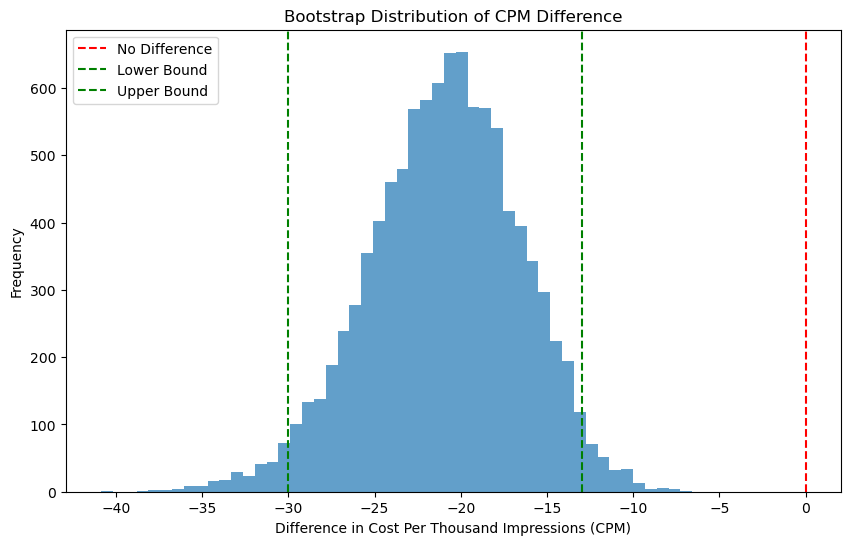

In [33]:
# Bootstrapping Cost Per Thousand Impressions (CPM)
control_cpm = control_df['Spend [USD]'] / (control_df['# of Impressions'] / 1000)
test_cpm = test_df['Spend [USD]'] / (test_df['# of Impressions'] / 1000)

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_cpm, test_cpm)

# Display results
print(f"95% Confidence Interval for the Difference in Cost Per Thousand Impressions : [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of CPM Difference')
plt.xlabel('Difference in Cost Per Thousand Impressions (CPM)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [ ]:
#The confidence interval being entirely negative confirms that the control campaign has a lower CPM than the test campaign, making it more efficient in terms of cost per impression. 
#This could be an important factor in deciding which campaign is better, especially if maximising impressions while minimising costs is a priority.

95% Confidence Interval for the Difference in Cost Per Acquisition (CPA) : [-2.1065, 0.3837]


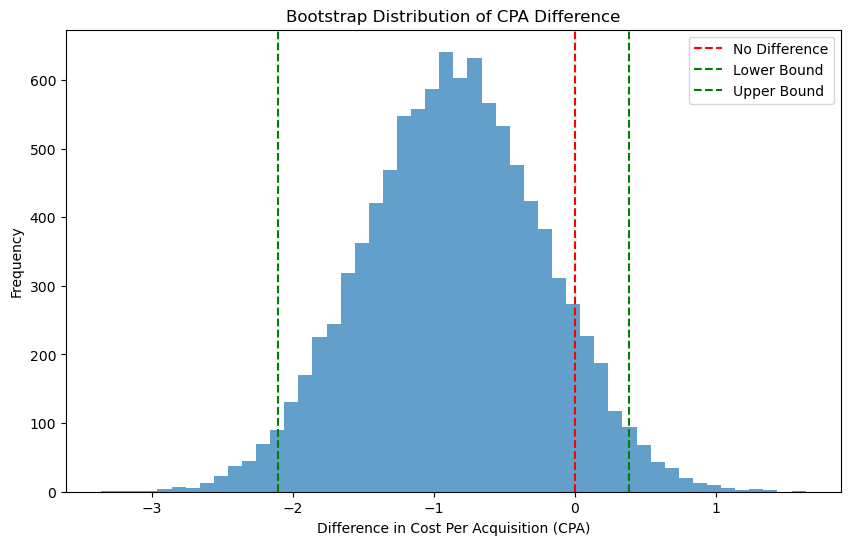

In [35]:
# Cost Per Acquisition (CPA) (CPA)
control_cpa = control_df['Spend [USD]'] / control_df['# of Purchase']
test_cpa = test_df['Spend [USD]'] / test_df['# of Purchase']

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_cpa, test_cpa)

# Display results
print(f"95% Confidence Interval for the Difference in Cost Per Acquisition (CPA) : [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of CPA Difference')
plt.xlabel('Difference in Cost Per Acquisition (CPA)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [ ]:
#Since the confidence interval includes zero, the analysis suggests that there might not be a statistically significant difference in CPA between the two campaigns. 
#Therefore, CPA alone may not be a decisive metric for choosing the better campaign.

95% Confidence Interval for the Difference in Conversion Funnel Metrics : [-0.0776, -0.0279]


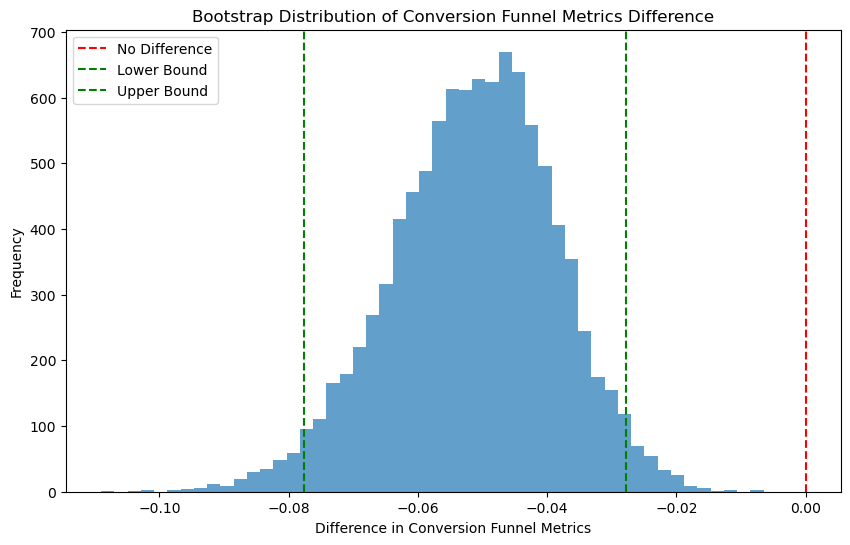

In [36]:
#Conversion Funnel Metrics
control_funnel = control_df['# of Website Clicks'] / control_df['# of Impressions']
test_funnel = test_df['# of Website Clicks'] / test_df['# of Impressions']

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_funnel, test_funnel)

# Display results
print(f"95% Confidence Interval for the Difference in Conversion Funnel Metrics : [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of Conversion Funnel Metrics Difference')
plt.xlabel('Difference in Conversion Funnel Metrics')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [ ]:
#result suggests that the control campaign may be more effective for driving users through this part of the conversion funnel.

95% Confidence Interval for the Difference in Engagement Metrics  : [-0.0773, -0.0283]


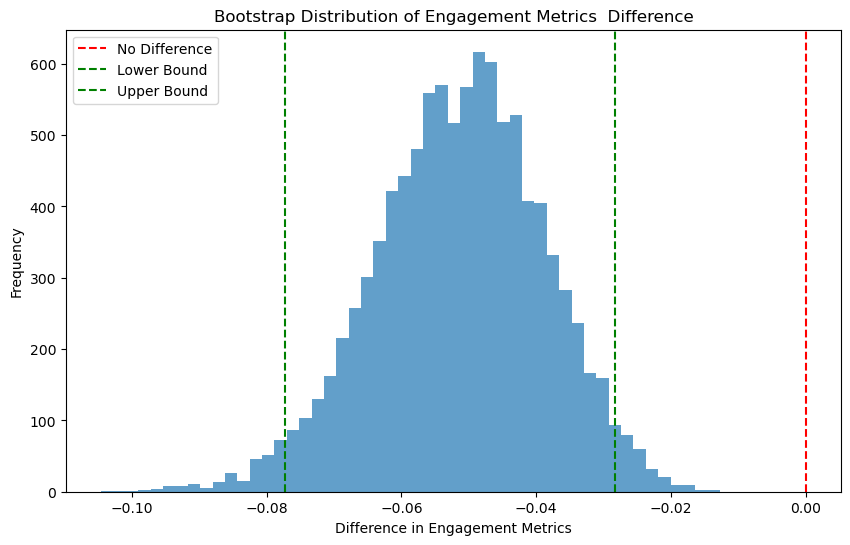

In [37]:
#Engagement Metrics 
control_ctr = control_df['# of Website Clicks'] / control_df['# of Impressions']
test_ctr = test_df['# of Website Clicks'] / test_df['# of Impressions']

# Perform bootstrapping
diff_distribution, lower, upper = bootstrap(control_ctr, test_ctr)

# Display results
print(f"95% Confidence Interval for the Difference in Engagement Metrics  : [{lower:.4f}, {upper:.4f}]")

# Plot the bootstrap distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(diff_distribution, bins=50, alpha=0.7)
plt.title('Bootstrap Distribution of Engagement Metrics  Difference')
plt.xlabel('Difference in Engagement Metrics')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.axvline(lower, color='green', linestyle='--', label='Lower Bound')
plt.axvline(upper, color='green', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [ ]:
#Confidence interval suggests that the control campaign outperforms the test campaign in engagement, and this difference is statistically significant. 
#Engagement is a key factor in campaign performance, so this result strongly indicates that the control campaign is more effective in driving user interaction.

In [38]:
#Conclusion
#Control Campaign Advantage: 
#The control campaign shows significant advantages in several key areas: higher conversion rates, lower CPM, better performance in conversion funnels, and higher engagement.
#These metrics indicate that the control campaign is more effective in driving user actions and is more cost-efficient in reaching the target audience.

#Test Campaign Weaknesses: 
#The test campaign does not show any statistically significant advantages in CPC or CPA, and it underperforms in critical areas like engagement and conversion rates.

#Given these findings, the control campaign appears to be the better choice based on this analysis. However, if the test campaign has other non-measurable benefits (e.g., a specific branding objective), that should also be considered. 
#But purely from a performance and cost-effectiveness standpoint, the control campaign is likely the more successful option.